## [Point in Polygon and Intersect analysis](https://autogis-site.readthedocs.io/en/latest/notebooks/L3/02_point-in-polygon.html)

In [2]:
from shapely.geometry import Point, Polygon

In [3]:
# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

In [4]:
# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [5]:
# Let's check what we have
print(p1)
print(p2)
print(poly)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


- lets check if the points are in polygon

In [6]:
p1.within(poly)

True

In [7]:
p2.within(poly)

False

- we can do it the other way round

In [8]:
poly.contains(p1)

True

In [9]:
poly.contains(p2)

False

### Intersect Analysis

In [10]:
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

- lets see if they intersect

In [11]:
line_a.intersects(line_b)

True

- do they touch?

In [12]:
line_a.touches(line_b)

True

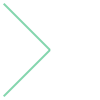

In [13]:
multi_line = MultiLineString([line_a, line_b])
multi_line

In [14]:
line_a.touches(line_a)

False

In [15]:
line_a.intersects(line_a)

True

### Point in Polygon using Geopandas

In [16]:
import geopandas as gpd

- lets add KML driver support to fiona

In [17]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [18]:
gpd.io.file.fiona.drvsupport.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r',
 'KML': 'rw'}

In [19]:
addresses = gpd.read_file('data/addresses.shp')
addresses.head()

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93166 60.16905)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Hels...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94168 60.16996)
3,"Hermannin rantatie, Verkkosaari, Kalasatama, S...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.97835 60.18976)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)


- read KML file

In [20]:
kml_file = 'data/PKS_suuralue.kml'
kml_data = gpd.read_file(kml_file, driver='KML')

In [21]:
kml_data.head()

,Name,Description,geometry
0,Suur-Espoonlahti,,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766..."
1,Suur-Kauklahti,,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155..."
2,Vanha-Espoo,,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752..."
3,Pohjois-Espoo,,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699..."
4,Suur-Matinkylä,,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537..."


<AxesSubplot:>

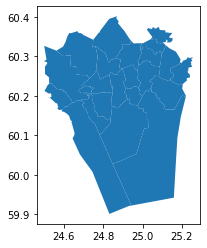

In [22]:
kml_data.plot()

In [23]:
southern = kml_data.loc[kml_data['Name']=='Eteläinen']

In [24]:
southern

,Name,Description,geometry
10,Eteläinen,,"POLYGON Z ((24.78277 60.09997 0.00000, 24.8197..."


In [26]:
import matplotlib.pyplot as plt

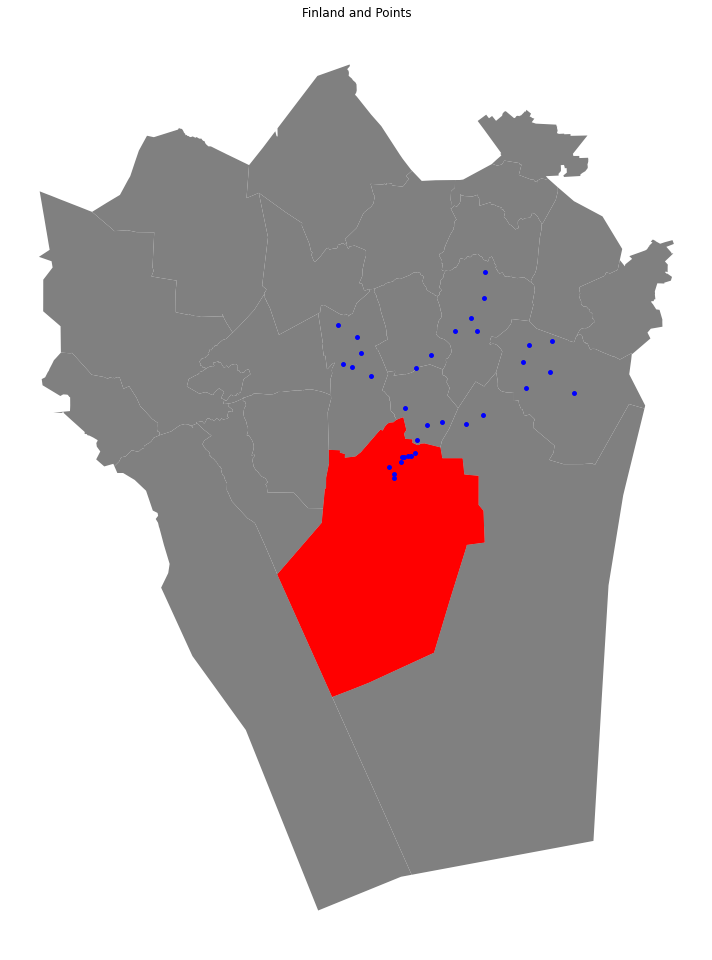

In [32]:
fig, ax = plt.subplots(figsize=(10, 15))
kml_data.plot(ax=ax, facecolor='gray')
southern.plot(ax=ax, facecolor='red')

addresses.plot(ax=ax, color='blue', markersize=15)
plt.axis("off")
plt.title("Finland and Points")
plt.tight_layout()

In [40]:
# Reset index for the selection
southern.reset_index(drop=True, inplace=True)

In [41]:
from shapely import speedups

- check for points that are in the selected region

In [45]:
mask = addresses.within(southern.at[0, 'geometry'])
print(mask)

0      True
1      True
2      True
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31     True
32     True
33     True
dtype: bool


Using the array of boolean values as a mask, we can use it to select the values select the values
that fall within the selected zone

In [46]:
pip_data = addresses.loc[mask]
pip_data

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93166 60.16905)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Hels...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94168 60.16996)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)
10,"Metro Rautatientori D, 1, Simonkatu, Kamppi, E...",1011,"Rautatientori 1, 00100 Helsinki, Finland",POINT (24.93774 60.16975)
30,"Kampin keskus, 1, Urho Kekkosen katu, Kamppi, ...",1031,"Urho Kekkosen katu 1, 00100 Helsinki, Finland",POINT (24.93312 60.16909)
31,"Ruoholahdenkatu, Hietalahti, Kamppi, Eteläinen...",1032,"Ruoholahdenkatu 17, 00101 Helsinki, Finland",POINT (24.93028 60.16650)
32,"Fitness online, 3, Tyynenmerenkatu, Jätkäsaari...",1033,"Tyynenmerenkatu 3, 00220 Helsinki, Finland",POINT (24.92119 60.15903)
33,"Oluthuone Kaisla, 4, Vilhonkatu, Kaisaniemi, K...",1034,"Vilhonkatu 4, 00101 Helsinki, Finland",POINT (24.94709 60.17191)


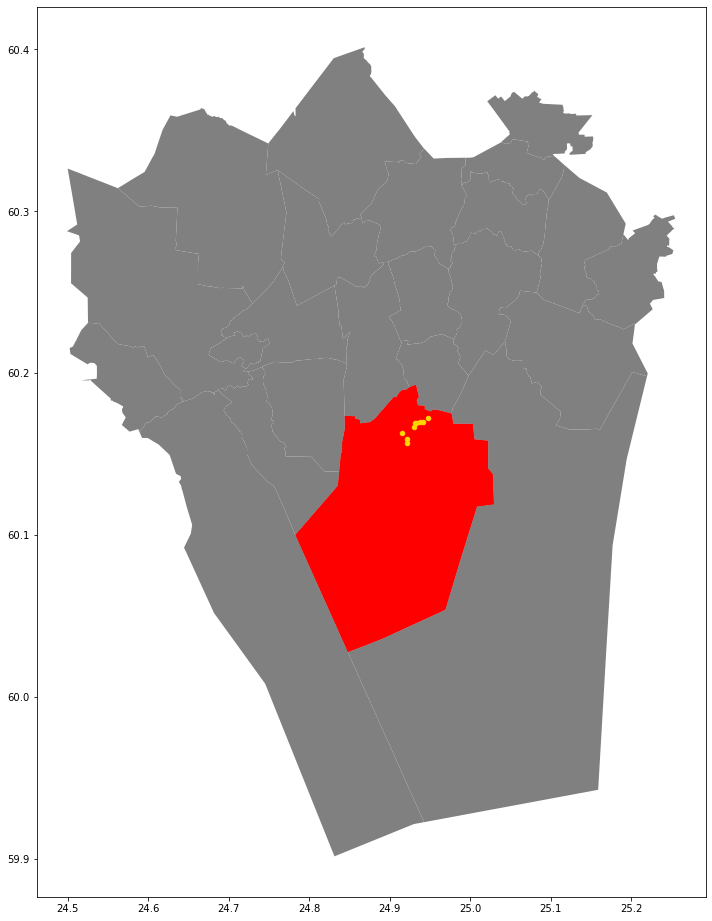

In [48]:
fig, ax = plt.subplots(figsize=(10, 15))
kml_data.plot(ax=ax, facecolor='gray')
southern.plot(ax=ax, facecolor='red')
pip_data.plot(ax=ax, color='gold', markersize=20)
plt.tight_layout()